<a href="https://colab.research.google.com/github/laurad08412/Metodos/blob/main/Lab2/Lab2Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['six', 5, 4, 3, 2, 1]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 21 µs


[[5, 8, 11], [8, 13, 18]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out
matmul(a,b)

[[5, 8, 11], [8, 13, 18]]

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
# Define matrices A and B
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[7, 8],
     [9, 10],
     [11, 12]]
# Shows the error
matmul(A,B)

[[58, 64], [139, 154]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
# Definición de la función matmul
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

# Matrices A y B
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

# Comprobación de compatibilidad y multiplicación de matrices
if len(a[0]) == len(b):
    result = matmul(a, b)
    print("Resultado de la multiplicación de matrices:")
    for row in result:
        print(row)
else:
    print("La multiplicación de matrices no es posible debido a dimensiones incompatibles.")


La multiplicación de matrices no es posible debido a dimensiones incompatibles.


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if len(A[0]) == len(B):

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print("Not compatible")
matmul(a,b)

Not compatible


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[7, 8],
     [9, 10],
     [11, 12]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if len(A[0]) == len(B):

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print("Not compatible")
matmul(a,b)

Not compatible


In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.8325106880351042

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.09288891067006289, 0.2962283067616015, 0.1304922343406092],
 [0.83299542993644, 0.8956007582766113, 0.8003136440650047]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import random

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if len(A[0]) == len(B):
        for i in range(rows_out):
            for j in range(cols_out):
                for k in range(len(B)):
                    out[i][j] += A[i][k] * B[k][j]
        return out
    else:
        print("Not compatible")

# Generar 10 pares de matrices aleatorias y multiplicarlas
for i in range(1, 11):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)
    result = matmul(randa, randb)
    if result:
        print(f"Resultado {i}:")
        for row in result:
            print(row)
        print()


Resultado 1:
[24.866841592443578, 22.938257184207835, 25.879905123615586, 25.613115103375794, 27.61574620265209, 26.76037632894663, 23.329617575781814, 26.481131501218957, 23.17605733319567, 25.611206538519696, 25.584330083556605, 26.318377301873134, 24.308480827674696, 28.289259153461007, 25.146403927944522, 27.288279019282562, 26.167575093043872, 26.146364491434767, 25.405319532497998, 25.361429528212007, 26.7000994492765, 22.454920924033864, 22.4863506114992, 25.25292187365386, 26.619324118356065, 26.006353681963166, 23.47532649564654, 27.750314192640662, 28.972198596267972, 26.909132294783255, 26.47297099780116, 23.51978461213518, 24.10865045189887, 24.286675602547497, 23.272121405959453, 23.97229879786032, 24.875528430221912, 24.098331981254987, 27.152980070483164, 25.656779355623616, 24.117852530933483, 26.73424185273096, 24.56838620124014, 28.12689656416798, 25.917783007792853, 23.873636159133692, 25.25162314826276, 23.060124263825088, 26.537792260111562, 24.38980124823993, 24.6

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import timeit
A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]

# Measure execution time for your example
execution_times = []
for _ in range(1000):
    start_time = timeit.default_timer()
    result = matmul(B, A)
    end_time = timeit.default_timer()
    execution_times.append(end_time - start_time)

# Calculate average execution time for your example
own_example_avg_time = sum(execution_times) / len(execution_times)

# Measure Python's average execution time
python_avg_time = timeit.timeit('matmul(A, B)', globals=globals(), number=1000) / 1000

# Create dataframe
df = pd.DataFrame({
    'Example': ['Example', 'Python'],
    'Average Execution Time (s)': [own_example_avg_time, python_avg_time]
})

print(df)

   Example  Average Execution Time (s)
0  Example                    0.000006
1   Python                    0.000006


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np
import time

# Definir las funciones y matrices
def random_matrix(rows, cols):
    return np.random.rand(rows, cols)

def matmul(a, b):
    return np.matmul(a, b)

# Inicializar las matrices
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

# Realizar la multiplicación y medir el tiempo 10 veces
num_iterations = 10
execution_times = []

for _ in range(num_iterations):
    start_time = time.time()
    result = matmul(randa, randb)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calcular el tiempo promedio
average_execution_time = np.mean(execution_times)

print(f"Tiempo promedio de ejecución: {average_execution_time} Segundos")


Tiempo promedio de ejecución: 0.003403592109680176 Segundos


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.4 ms, sys: 5.96 ms, total: 12.4 ms
Wall time: 9.2 ms


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 11.3 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 203 µs, sys: 0 ns, total: 203 µs
Wall time: 211 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
%%fortran

program MatrixDefinition
  implicit none

  ! Declare matrices A and B
  real(8) :: A(2,2)
  real(8) :: B(2,2)

  ! Initialize matrices A and B
  A = reshape([1.0d0, 2.0d0, 3.0d0, 4.0d0], shape(A))
  B = reshape([5.0d0, 6.0d0, 7.0d0, 8.0d0], shape(B))

  ! Print the matrices
  write(*,*) 'Matrix A:'
  write(*,*) A

  write(*,*) 'Matrix B:'
  write(*,*) B

end program MatrixDefinition


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
%%writefile matmul.f90
subroutine matmul(A, B, C)
    implicit none
    real(8), dimension(2, 2), intent(in) :: A, B
    real(8), dimension(2, 2), intent(out) :: C
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            C(i, j) = 0.0
            do k = 1, 2
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul



/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/root/.cache/ipython/fortranmagic/6115fcdf/_fortran_magic_eef4868ad14c799c4d4a129556ae9292.f90:1:2:

    1 | %%writefile matmul.f90
      |  1
Error: Invalid character in name at (1)
error: Command "/usr/bin/gfortran -Wall -g -fno-second-underscore -fPIC -O3 -funroll-loops -I/tmp/tmp00eeg_71/src.linux-x86_64-3.10 -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I/usr/include/python3.10 -c -c

running build
running config_cc
INFO: unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
INFO: unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
INFO: build_src
INFO: building extension "_fortran_magic_eef4868ad14c799c4d4a129556ae9292" sources
INFO: f2py options: []
INFO: f2py:> /tmp/tmp00eeg_71/src.linux-x86_64-3.10/_fortran_magic_eef4868ad14c799c4d4a129556ae9292module.c
creating /tmp/tmp00eeg_71/src.linux-x86_64-3.10
Reading fortran codes...
	Reading file '/root/.cache/ipython/fortranmagic/6115fcdf/_fortran_magic_eef4868ad14c799c4d4a129556ae9292.f90' (format:free)
Post-processing...
	Block: _fortran_magic_eef4868ad14c799c4d4a129556ae9292
			Block: matmul
Applying post-processing hooks...
  character_backward_compatibility_hook
Post-processing (stage 2)...
Building modules...
    Building module "_fortran_magic_eef4868ad14c799c4d4a129556ae9292"...
    Generating possibly empty wrapp

RuntimeError: f2py failed, see output

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%fortran
%%writefile matmul.f90
subroutine matmul(A, B, C, m, n, p)
    implicit none
    real(8), dimension(m, n) :: A
    real(8), dimension(n, p) :: B
    real(8), dimension(m, p) :: C
    integer, intent(in) :: m, n, p
    integer :: i, j, k

    do i = 1, m
        do j = 1, p
            C(i, j) = 0.0
            do k = 1, n
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul


UsageError: Cell magic `%%fortran` not found.


In [ ]:
!gfortran -shared -o matmul.so matmul.f90

In [ ]:
!nm -D matmul.so | grep matmul

00000000000010f9 T matmul_


In [ ]:
import numpy as np
from ctypes import CDLL, POINTER, c_int, c_double

def run_matmul(A, B, m, n, p):
    command = f'./matmul {A} {B} {m} {n} {p}'
    start_time = time.time()
    subprocess.run(command, shell=True)
    end_time = time.time()
    execution_time = end_time - start_time
    return command

A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]


# Set matrix dimensions
m, n, p = 2, 2, 2
run_matmul(A, B, m, n, p)




'./matmul [[1, 2], [3, 4]] [[5, 6], [7, 8]] 2 2 2'

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Call the matrix multiplication subroutine
  call matmul(A, B, C)

  ! Print the result (you can modify this part as needed)
  write(*,*) "Matrix C (", m, "x", p, "):"
  do i = 1, m
    write(*, '(600F10.3)') (C(i, j), j = 1, p)
  end do

contains

  subroutine matmul(A, B, C)
    real(8), intent(in) :: A(:, :)
    real(8), intent(in) :: B(:, :)
    real(8), intent(out) :: C(:, :)
    integer :: i, j, k

    ! Perform matrix multiplication
    do i = 1, m
      do j = 1, p
        C(i, j) = 0.0d0
        do k = 1, n
          C(i, j) = C(i, j) + A(i, k) * B(k, j)
        end do
      end do
    end do

  end subroutine matmul

end program matrix_multiply


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
! matmul.f90
subroutine matmul(A, B, C, m, n, p)
  real(8), dimension(:,:) :: A, B, C
  integer, intent(in) :: m, n, p
  integer :: i, j, k

  do j = 1, p
    do i = 1, m
      C(i, j) = 0.0
      do k = 1, n
        C(i, j) = C(i, j) + A(i, k) * B(k, j)
      end do
    end do
  end do
end subroutine matmul

! Main program to read matrices and call matmul subroutine
program main
  real(8), dimension(:,:), allocatable :: A, B, C
  integer :: m, n, p, i, j

  ! Set matrix dimensions
  m = 600
  n = 100
  p = 600

  ! Allocate and initialize matrices A and B
  allocate(A(m, n), B(n, p), C(m, p))
  do i = 1, m
    do j = 1, n
      A(i, j) = 1.0 ! You can initialize with your values
    end do
  end do
  do i = 1, n
    do j = 1, p
      B(i, j) = 2.0 ! You can initialize with your values
    end do
  end do

  ! Call the matmul subroutine
  call matmul(A, B, C, m, n, p)

  ! Print the result matrix C if needed
  ! print *, "Result Matrix C:"
  ! do i = 1, m
  !   do j = 1, p
  !     print *, C(i, j)
  !   end do
  ! end do

  ! Deallocate matrices
  deallocate(A, B, C)
end program main


SyntaxError: invalid syntax (<ipython-input-70-9c8895043610>, line 2)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
! matmul.f90
subroutine matmul(A, B, C, m, n, p)
  real(8), dimension(:,:) :: A, B, C
  integer, intent(in) :: m, n, p
  integer :: i, j, k

  do j = 1, p
    do i = 1, m
      C(i, j) = 0.0
      do k = 1, n
        C(i, j) = C(i, j) + A(i, k) * B(k, j)
      end do
    end do
  end do
end subroutine matmul

SyntaxError: invalid syntax (<ipython-input-69-2fb9064f696f>, line 2)

In [ ]:
!apt-get install gfortran
!gfortran -o matmul matmul.f90

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
f951: Error: Cannot open file ‘matmul.f90’
<built-in>: Fatal Error: cannot open input file: matmul.f90
compilation terminated.


In [ ]:
import subprocess
import time
import pandas as pd

# Function to run Fortran code and measure execution time
def run_matmul(m, n, p):
    command = f'./matmul {m} {n} {p}'
    start_time = time.time()
    subprocess.run(command, shell=True)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Set matrix dimensions
m, n, p = 600, 100, 600
num_runs = 10

# Create a DataFrame to store execution times
df = pd.DataFrame(columns=['Run', 'Execution Time'])

# Run the Fortran subroutine multiple times and store execution times in the DataFrame
for run in range(1, num_runs + 1):
    execution_time = run_matmul(m, n, p)
    df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)

# Display the DataFrame
print(df)

    Run  Execution Time
0   1.0        0.007433
1   2.0        0.002407
2   3.0        0.002006
3   4.0        0.001396
4   5.0        0.001492
5   6.0        0.002046
6   7.0        0.001326
7   8.0        0.001497
8   9.0        0.002110
9  10.0        0.001542


<ipython-input-51-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)
<ipython-input-51-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)
<ipython-input-51-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)
<ipython-input-51-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran
program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j, k

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Perform matrix multiplication
  do i = 1, m
    do j = 1, p
      C(i, j) = 0.0d0
      do k = 1, n
        C(i, j) = C(i, j) + A(i, k) * B(k, j)
      end do
    end do
  end do

  ! Print the result (you can modify this part as needed)
  write(*,*) "Matrix C (", m, "x", p, "):"
  do i = 1, m
    write(*, '(600F10.3)') (C(i, j), j = 1, p)
  end do

end program matrix_multiply


The extension _fortran_magic_d1c1f3ca9a31452051798518563c6d08 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran
program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j, run
  real(8) :: start_time, end_time, execution_time, total_execution_time

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Initialize total_execution_time
  total_execution_time = 0.0d0

  ! Perform 10 runs
  do run = 1, 10

    ! Measure the start time
    call cpu_time(start_time)

    ! Call the matrix multiplication subroutine
    call matmul(A, B, C)

    ! Measure the end time
    call cpu_time(end_time)

    ! Calculate the execution time
    execution_time = end_time - start_time

    ! Add the execution time to the total
    total_execution_time = total_execution_time + execution_time

    ! Print the result for each run (you can modify this part as needed)
    write(*,*) "Run", run, "- Execution Time:", execution_time, "seconds"

  end do

  ! Calculate the average execution time
  total_execution_time = total_execution_time / 10.0d0

  ! Print the average execution time
  write(*,*) "Average Execution Time:", total_execution_time, "seconds"

contains

  subroutine matmul(A, B, C)
    real(8), intent(in) :: A(:, :)
    real(8), intent(in) :: B(:, :)
    real(8), intent(out) :: C(:, :)
    integer :: i, j, k

    ! Perform matrix multiplication
    do i = 1, m
      do j = 1, p
        C(i, j) = 0.0d0
        do k = 1, n
          C(i, j) = C(i, j) + A(i, k) * B(k, j)
        end do
      end do
    end do

  end subroutine matmul

end program matrix_multiply


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
%%fortran
program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j
  real(8) :: start_time, end_time, execution_time

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Measure the execution time using Fortran's intrinsic function CPU_TIME
  call cpu_time(start_time)

  ! Call the matrix multiplication subroutine
  call matmul(A, B, C)

  ! Measure the end time
  call cpu_time(end_time)

  ! Calculate the execution time
  execution_time = end_time - start_time

  ! Print the result (you can modify this part as needed)
  write(*,*) "Matrix C (", m, "x", p, "):"
  do i = 1, m
    write(*, '(600F10.3)') (C(i, j), j = 1, p)
  end do

  ! Print the execution time
  write(*,*) "Execution Time:", execution_time, "seconds"

contains

  subroutine matmul(A, B, C)
    real(8), intent(in) :: A(:, :)
    real(8), intent(in) :: B(:, :)
    real(8), intent(out) :: C(:, :)
    integer :: i, j, k

    ! Perform matrix multiplication
    do i = 1, m
      do j = 1, p
        C(i, j) = 0.0d0
        do k = 1, n
          C(i, j) = C(i, j) + A(i, k) * B(k, j)
        end do
      end do
    end do

  end subroutine matmul

end program matrix_multiply


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiply.c
#include <stdio.h>
#include <stdlib.h>

#define M 600
#define N 100
#define P 600

// Función para inicializar una matriz con valores aleatorios
void initializeMatrix(double (*matrix)[P], int rows, int cols) {
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            matrix[i][j] = (double)rand() / RAND_MAX;  // Valores aleatorios entre 0 y 1
        }
    }
}

// Función para multiplicar dos matrices
void multiplyMatrices(double A[M][N], double B[N][P], double result[M][P]) {
    for (int i = 0; i < M; ++i) {
        for (int j = 0; j < P; ++j) {
            result[i][j] = 0.0;
            for (int k = 0; k < N; ++k) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[M][N], B[N][P], result[M][P];

    // Inicializar las matrices A y B
    initializeMatrix(A, M, N);
    initializeMatrix(B, N, P);

    // Realizar la multiplicación de matrices 10 veces
    for (int iteration = 1; iteration <= 10; ++iteration) {
        multiplyMatrices(A, B, result);
    }

    printf("Multiplicación de matrices completada 10 veces.\n");

    return 0;
}


Overwriting matrix_multiply.c


In [ ]:
!gcc -o matrix_multiply matrix_multiply.c
!./matrix_multiply


matrix_multiply.c: In function ‘main’:
matrix_multiply.c:33:22: warning: passing argument 1 of ‘initializeMatrix’ from incompatible pointer type []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wincompatible-pointer-types-Wincompatible-pointer-types]8;;]
   33 |     initializeMatrix(A, M, N);
      |                      ^
      |                      |
      |                      double (*)[100]
matrix_multiply.c:9:32: note: expected ‘double (*)[600]’ but argument is of type ‘double (*)[100]’
    9 | void initializeMatrix(double (*matrix)[P], int rows, int cols) {
      |                       ~~~~~~~~~^~~~~~~~~~
Multiplicación de matrices completada 10 veces.


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 21 - Adding c average execution time to the data frame**

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 24 - Adding C++ average execution time to the data frame**

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 27 - Adding Java average execution time to the data frame**

**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 30 - Adding Javascript average execution time to the data frame**

**My own example 31 - Finding the minimun average esecuiton time in the data frame**

**My own example 32 - Adding the Speed factor columne to the data frame**

**My own example 33 - Sorting the the data frame by average execution time**

,Language,Average Secs,Speed factor
1,NumPy,0.006613,1.000000
3,Fortran,0.007648,1.156599
2,Fortranmagic,0.014852,2.245952
6,Java,0.076835,11.619354
4,c,0.200000,30.244991
5,C++,0.221157,33.444457
7,Javascript,0.282100,42.660559
0,Python,8.277163,1251.713539


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

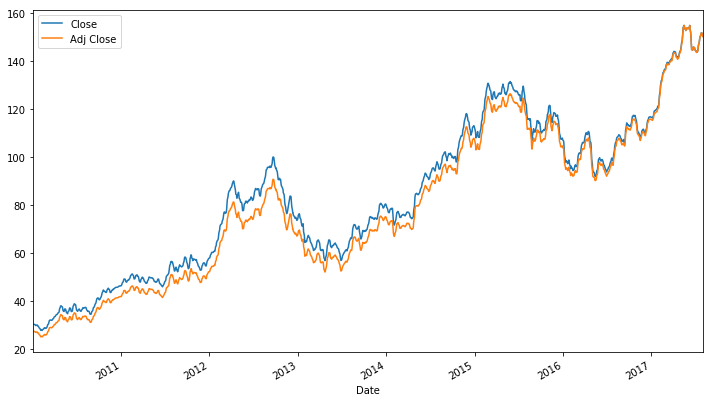

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

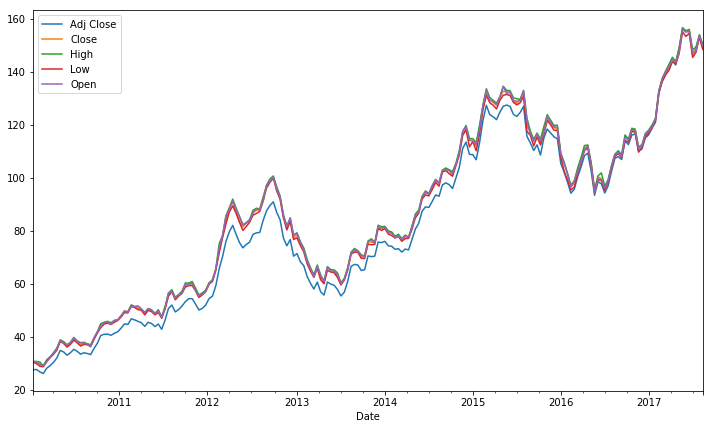

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

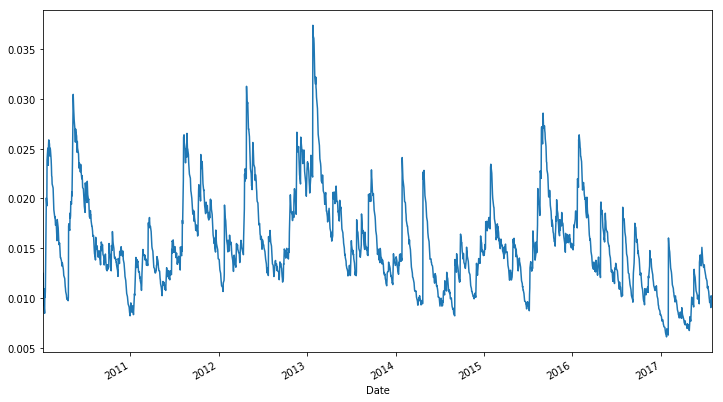

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

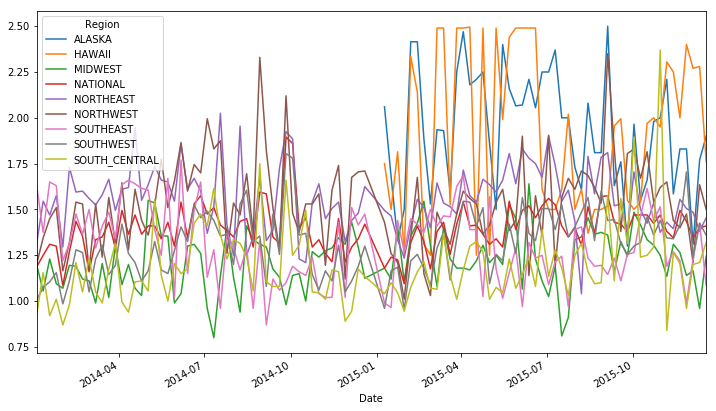

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

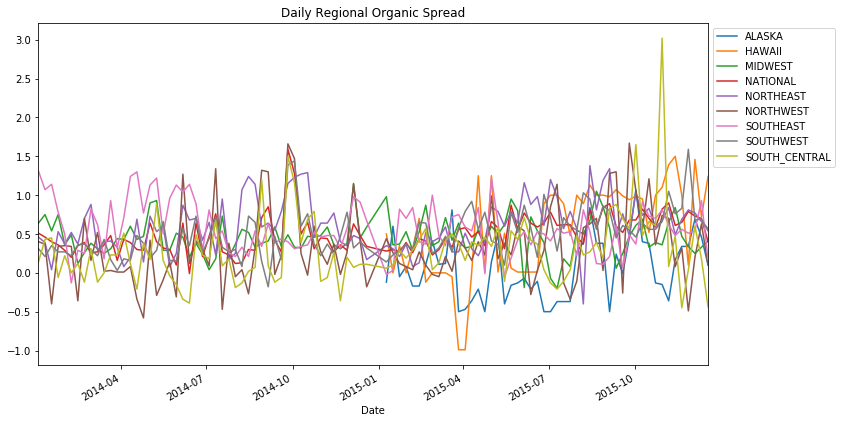

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


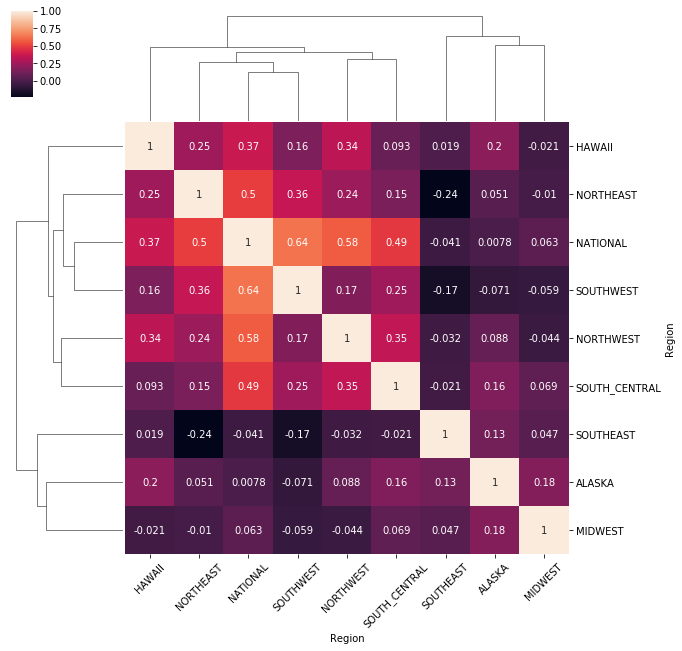

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!